In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym

In [161]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward(x, W1, b1, W2, b2):
    z1 = x @ W1.T + b1.T
    a1 = sigmoid(z1)
    z2 = a1 @ W2.T + b2.T
    return z2

In [97]:
#Calculo del gradiente numerico

W_1, W_2, b_1, b_2, x_i, y_i = sym.symbols('W_1 W_2 b_1 b_2 x_i y_i')
sym_l = 1/2 * (W_2 * 1/(1 + sym.exp(-(W_1 * x_i + b_1))) + b_2 - y_i)**2

l_w1 = sym_l.diff(W_1)
l_w2 = sym_l.diff(W_2)
l_b1 = sym_l.diff(b_1)
l_b2 = sym_l.diff(b_2)

l_r_w1 = sym.lambdify((W_1, W_2, b_1, b_2, x_i, y_i), l_w1)
l_r_w2 = sym.lambdify((W_1, W_2, b_1, b_2, x_i, y_i), l_w2)
l_r_b1 = sym.lambdify((W_1, W_2, b_1, b_2, x_i, y_i), l_b1)
l_r_b2 = sym.lambdify((W_1, W_2, b_1, b_2, x_i, y_i), l_b2)

In [114]:
def loss(x_i, y_i, W1, b1, W2, b2):
    return 1/2 * (forward(x_i, W1, b1, W2, b2) - y_i)**2

# \theta_{t+1} = \theta_t - \alpha \frac{\partial L}{\partial \theta}(\theta_t)

def numerical_gradient(eps, x_i, y_i, W1, b1, W2, b2, alpha):
    
    l_r_W1 = (loss(x_i, y_i, W1 + eps, b1, W2, b2) - loss(x_i, y_i, W1 - eps, b1, W2, b2) / (2 * eps))
    l_r_b1 = (loss(x_i, y_i, W1, b1 + eps, W2, b2) - loss(x_i, y_i, W1, b1 - eps, W2, b2) / (2 * eps))
    l_r_W2 = (loss(x_i, y_i, W1, b1, W2 + eps, b2) - loss(x_i, y_i, W1, b1, W2 - eps, b2) / (2 * eps))
    l_r_b2 = (loss(x_i, y_i, W1, b1, W2, b2 + eps) - loss(x_i, y_i, W1, b1, W2, b2 - eps) / (2 * eps))

    W1_ = W1 - alpha * np.mean(l_r_W1)
    b1_ = b1 - alpha * np.mean(l_r_b1)
    W2_ = W2 - alpha * np.mean(l_r_W2)
    b2_ = b2 - alpha * np.mean(l_r_b2)

    return W1_, b1_, W2_, b2_


In [100]:
#Inicializacion de pesos
W1 = np.random.random((5,6))
b1 = np.random.random((5,1))

W2 = np.random.random((1,5))
b2 = np.random.random((1,1))

display(W1, b1, W2, b2)

array([[0.71924262, 0.83574391, 0.9604143 , 0.56710861, 0.80096772,
        0.36579283],
       [0.99786278, 0.95901988, 0.6108568 , 0.9909269 , 0.1086536 ,
        0.25212119],
       [0.59988936, 0.03287162, 0.14734478, 0.7890223 , 0.85647758,
        0.80602033],
       [0.05792731, 0.6517728 , 0.67321431, 0.21996205, 0.86172154,
        0.85594157],
       [0.71802229, 0.64971445, 0.35677804, 0.5829452 , 0.4794751 ,
        0.06625921]])

array([[0.36953233],
       [0.23192118],
       [0.80431604],
       [0.10097751],
       [0.94978634]])

array([[0.25638472, 0.2387607 , 0.88957332, 0.16229908, 0.73091303]])

array([[0.17497787]])

In [126]:
#funcion fit y loop de entrenamiento
def fit(x, y, learning_rate=0.001, epochs=1000):
    
    W1 = np.random.random((1,6))
    b1 = np.random.random((5,1))

    W2 = np.random.random((1,5))
    b2 = np.random.random((1,1))

    print("Initial parameters")
    display(W1, b1, W2, b2)

    eps = 1e-3
    loss_accum = []

    print("Training...")

    for i in range(epochs):
        
        loss_accum.append(np.mean(loss(x, y, W1, b1, W2, b2)))

        W1, b1, W2, b2 = numerical_gradient(eps, x, y, W1, b1, W2, b2, learning_rate)
        
        print("Epoch: ", i, "Parameters: ")
        display(W1, b1, W2, b2)

    return loss_accum, W1, b1, W2, b2

In [9]:
def predict(x, W1, b1, W2, b2):
        return forward(x, W1, b1, W2, b2)

In [4]:
real_estate: pd.DataFrame = pd.read_excel('data/Real estate valuation data set.xlsx')
real_estate.drop(['No'], axis=1, inplace=True)

short = real_estate.copy()
short.columns = short.columns.map(lambda x: x.split(' ')[0])
display(short.head())

,X1,X2,X3,X4,X5,X6,Y
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
X_matrix: np.ndarray = np.array(real_estate.drop(['Y house price of unit area'], axis=1))
y_matrix: np.ndarray = np.array(real_estate['Y house price of unit area']).reshape(-1, 1)

X_train: np.ndarray = X_matrix[0:315]
y_train: np.ndarray = y_matrix[0:315]

X_test: np.ndarray = X_matrix[315:]
y_test: np.ndarray = y_matrix[315:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((315, 6), (315, 1), (99, 6), (99, 1))

In [11]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5
0,2013.083333,15.6,1756.4110,2.0,24.98320,121.51812
1,2013.250000,13.3,250.6310,7.0,24.96606,121.54297
2,2012.750000,15.6,752.7669,2.0,24.97795,121.53451
3,2013.333333,7.1,379.5575,10.0,24.98343,121.53762
4,2013.250000,34.6,272.6783,5.0,24.95562,121.53872


In [14]:
X_test[0]

array([2.01308333e+03, 1.56000000e+01, 1.75641100e+03, 2.00000000e+00,
       2.49832000e+01, 1.21518120e+02])

In [17]:
predict(X_test[0], W1, b1, W2, b2)

array([[3.25136437]])

In [23]:
loss(X_test[0], y_test[0], W1, b1, W2, b2)

array([[289.16843775]])

In [169]:
loss_accum, W1, b1, W2, b2 = fit(X_train.T, y_train.T, learning_rate=0.000001, epochs=10)

Initial parameters


array([[0.7399468 , 0.88583481, 0.70091589, 0.48095884, 0.02366507,
        0.47976596]])

array([[0.53247802],
       [0.94523974],
       [0.57466671],
       [0.5440211 ],
       [0.28300546]])

array([[0.9826376 , 0.29967796, 0.42478612, 0.4687891 , 0.14985547]])

array([[0.38958733]])

Training...


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 315)

In [167]:
display(W1, b1, W2, b2)

array([[4.94078313, 5.11400279, 4.65665373, 4.67870076, 5.03065252,
        4.52728996]])

array([[5.11162625],
       [5.39799118],
       [4.58907381],
       [5.11478327],
       [4.88005404]])

array([[5.34321917, 4.85980929, 4.96356227, 5.17729779, 4.53707707]])

array([[4.69885911]])

In [146]:
predict(X_test[0], W1, b1, W2, b2)

array([[29.57982471]])

In [168]:
X_test[0], y_test[0]

(array([2.01308333e+03, 1.56000000e+01, 1.75641100e+03, 2.00000000e+00,
        2.49832000e+01, 1.21518120e+02]),
 array([27.3]))

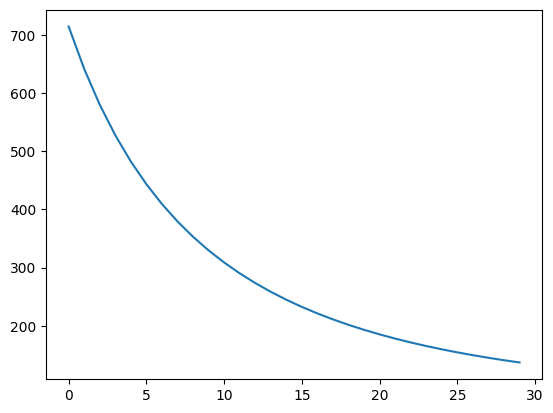

In [147]:
plt.plot(loss_accum)

In [47]:
predict(X_test[0], W1, b1, W2, b2)

array([[nan]])

In [159]:
X_test.shape, W1.shape, b1.shape, W2.shape, b2.shape

((99, 6), (1, 6), (5, 1), (1, 5), (1, 1))

In [ ]:
X_test @ W1.T + b1.T

In [162]:
# Plot accuracy

predict(X_test, W1, b1, W2, b2)

array([[29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29.57982471],
       [29